## Andrea intro to python, lesson 2 (1/14/18)
___

### importing pandas:

In [2]:
import pandas as pd
import numpy as np

### creating a dataframe:

Note: dataframes form the basic building block of pandas, an easy to use, intuitive, and powerful data analysis structure. Much like dataframes in R/Rstudio, pandas datasets are "tidy data": Each variables is saved in a column, and each observation is saved in a row. Tidy datasets preserve observations as you manipulate variables.

In [2]:
# specify values for each column:
df = pd.DataFrame(
    {'a':[4,5,6],
    'b':[7,8,9],
    'c':[10,11,12],},
index = [1,2,3])
df

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [42]:
# specify values for each row:
df = pd.DataFrame(
[[4,5,6],
[7,8,9],
[10,11,12]],
index = [1,2,3],
columns = ['column1', 'b', '3'])
df

3

In [41]:
df.column1*df.b
df.loc[4] = list(df.column1*df.b)
df

,column1,b,3
1,4,5,6
2,7,8,9
3,10,11,12
4,20,56,110


### Indexing in pandas:

Here we want to learn how to subset rows or columns.

In [12]:
# selecting a specific column:
#df['column1']

# alternatively:

#df.column1

# operations with selected data?

#sum(df.column1)
# selecting multiple columns?

df[['3', 'column1']]
# list all columns names?

df

,column1,b,3
1,4,5,6
2,7,8,9
3,10,11,12


In [14]:
# selecting a specific row (via index):
df.iloc[1]

# selecting multiple?

df.iloc[1:3]

# operations with selected data?
sum(df.iloc[1])

24

### Let's create a second dataframe, and see how to append them together:

In [15]:
df2 = pd.DataFrame(
[[np.nan,14,15],
[16,np.nan,18],
[19,20,np.nan]],
index = [1,2,3],
columns = ['d', 'e', 'f'])

df2

,d,e,f
1,NaN,14.0,15.0
2,16.0,NaN,18.0
3,19.0,20.0,NaN


In [16]:
df

,column1,b,3
1,4,5,6
2,7,8,9
3,10,11,12


In [17]:
# adding a column from df2 to df1:

df['newcol'] = df2['f']
df

,column1,b,3,newcol
1,4,5,6,15.0
2,7,8,9,18.0
3,10,11,12,NaN


In [28]:
# adding a calculated column:

df['calc_col'] = df['column1']*df['b']
df

# or:

# df['calc_col'] = df.column1*df.b
# df
new_row = [54,65,67, 3, 99]
df.loc[4] = new_row
df

,column1,b,3,newcol,calc_col
1,4,5,6,15.0,20
2,7,8,9,18.0,56
3,54,65,67,3.0,3510
4,54,65,67,3.0,99


### concatenating dataframes:

In [47]:
# we have two dataframes of equal size, and are adding df2 to df

df_df2_concat = pd.concat([df, df2], axis=1)
df_df2_concat

,column1,b,3,d,e,f
1,4,5,6,NaN,14.0,15.0
2,7,8,9,16.0,NaN,18.0
3,10,11,12,19.0,20.0,NaN


In [50]:
df2

,d,e,f
1,NaN,14.0,15.0
2,16.0,NaN,18.0
3,19.0,20.0,NaN


In [48]:
# lets add df2 to the bottom of df:
df_df2_vert_concat = pd.concat([df, df2], ignore_index=True)
df_df2_vert_concat

,3,b,column1,d,e,f
0,6.0,5.0,4.0,NaN,NaN,NaN
1,9.0,8.0,7.0,NaN,NaN,NaN
2,12.0,11.0,10.0,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,14.0,15.0
4,NaN,NaN,NaN,16.0,NaN,18.0
5,NaN,NaN,NaN,19.0,20.0,NaN


In [247]:
# what if uneven?

# let's add another row to df2:

df2 = df2.append(pd.DataFrame([[5, 6, 7], [7, 8, 9]], columns=list('def')), ignore_index=True)
df2

,d,e,f
0,NaN,14.0,15.0
1,16.0,NaN,18.0
2,19.0,20.0,NaN
3,5.0,6.0,7.0
4,7.0,8.0,9.0


In [51]:
# concatenate df and df2 (uneven):

# pd.concat([df,df1], axis=0, ignore_index=True)

# specify values for each row:
df3 = pd.DataFrame(
[[4,5,6],
[7,8,9],
[10,11,12]],
index = [1,2,3],
columns = ['column1', 'b', '3'])
df3

,column1,b,3
1,4,5,6
2,7,8,9
3,10,11,12


In [60]:
# specify values for each row:
df4 = pd.DataFrame(
[[4,5,6],
[7,8,9],
[10,11,12]],
index = [1,2,3],
columns = ['blah', 'thing', 'another'])
df4

,blah,thing,another
1,4,5,6
2,7,8,9
3,10,11,12


In [58]:
frames = [df3, df4]
pd.concat([df3, df4], axis=1)

,column1,b,3,blah,thing,another
1,4,5,6,4,5,6
2,7,8,9,7,8,9
3,10,11,12,10,11,12


___
### Pandas can read built-in datasets from other packages or through online .csv files; let's load one and play around with the data:

In [61]:
# using sklearn:

from sklearn.datasets import load_iris
iris = load_iris()
data = iris.data
column_names = iris.feature_names
species_names = iris.target_names

iris_df = pd.DataFrame(iris.data, columns= column_names)
iris_df.head() # missing species?

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [62]:
data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
data1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [3]:
# loading a dataframe from a url:
iris_df2 = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

In [75]:
iris_df2.head()
list(iris_df2.columns)
iris_df2['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [74]:
# using seaborn:

import seaborn.apionly as sns
iris_df = sns.load_dataset('iris')
iris_df.head()

ModuleNotFoundError: No module named 'seaborn'

### Let's inspect our data:

In [76]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [77]:
# print full dataframe:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [78]:
# how many observations?
num_rows = len(iris_df)
print('number of observations:', num_rows)

number of observations: 150


In [79]:
# get column names (features):
num_cols = len(iris_df.columns)
print('number of features:', num_cols)
print("features:", list(iris_df.columns))

number of features: 4
features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


### Manipulating/sorting our dataframe:

In [81]:
# unique values within a column?
num_species = iris_df2['species'].nunique()
species_list = list(iris_df2['species'].unique())
print('number of species:',num_species)
print('species:',species_list)

number of species: 3
species: ['setosa', 'versicolor', 'virginica']


In [83]:
# sum of a column:
sum(iris_df2['sepal_length'])

876.50000000000023

In [84]:
# minimum value:
min(iris_df2['sepal_length'])

4.2999999999999998

In [85]:
# maximum value:
max(iris_df2['sepal_length'])

7.9000000000000004

In [91]:
# mean value (using numpy):
np.mean(iris_df2['sepal_length'])
# sum(iris_df2['sepal_length'])/len(iris_df2['sepal_length'])

5.8433333333333337

In [93]:
# subsetting data by columns:

iris_df2['species']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
5         setosa
6         setosa
7         setosa
8         setosa
9         setosa
10        setosa
11        setosa
12        setosa
13        setosa
14        setosa
15        setosa
16        setosa
17        setosa
18        setosa
19        setosa
20        setosa
21        setosa
22        setosa
23        setosa
24        setosa
25        setosa
26        setosa
27        setosa
28        setosa
29        setosa
         ...    
120    virginica
121    virginica
122    virginica
123    virginica
124    virginica
125    virginica
126    virginica
127    virginica
128    virginica
129    virginica
130    virginica
131    virginica
132    virginica
133    virginica
134    virginica
135    virginica
136    virginica
137    virginica
138    virginica
139    virginica
140    virginica
141    virginica
142    virginica
143    virginica
144    virginica
145    virginica
146    virginica
147    virgini

In [94]:
# subsetting data by rows:

# we can do this manually:

iris_df2.iloc[0:10] # first 10 observations

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [97]:
# but we could also do this in a way that's a bit more useful:

# let's say we're interested in looking at all the data where
# petal_length is above a certain value:

iris_df2[iris_df2.petal_length > 5.9]

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,virginica
105,7.6,3.0,6.6,2.1,virginica
107,7.3,2.9,6.3,1.8,virginica
109,7.2,3.6,6.1,2.5,virginica
117,7.7,3.8,6.7,2.2,virginica
118,7.7,2.6,6.9,2.3,virginica
122,7.7,2.8,6.7,2.0,virginica
125,7.2,3.2,6.0,1.8,virginica
130,7.4,2.8,6.1,1.9,virginica
131,7.9,3.8,6.4,2.0,virginica


In [103]:
# or what about selecting columns in a useful way?

# selecting all columns that start in a certain way:

iris_df2.filter(regex='length$') # selects all rows ending in 'length'

# can do pretty much any sort of selecting w/ regular expressions

,sepal_length,petal_length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
5,5.4,1.7
6,4.6,1.4
7,5.0,1.5
8,4.4,1.4
9,4.9,1.5


In [105]:
# let's say we wanted to organize our data in a meaningful way, for example, listing low to high:

iris_df2.sort_values('petal_width')

# NB: see that pandas preserves observations following the sort

,sepal_length,sepal_width,petal_length,petal_width,species
32,5.2,4.1,1.5,0.1,setosa
13,4.3,3.0,1.1,0.1,setosa
37,4.9,3.6,1.4,0.1,setosa
9,4.9,3.1,1.5,0.1,setosa
12,4.8,3.0,1.4,0.1,setosa
0,5.1,3.5,1.4,0.2,setosa
27,5.2,3.5,1.5,0.2,setosa
28,5.2,3.4,1.4,0.2,setosa
29,4.7,3.2,1.6,0.2,setosa
30,4.8,3.1,1.6,0.2,setosa


In [106]:
# what about high to low?

iris_df2.sort_values('petal_width', ascending=False)

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,virginica
109,7.2,3.6,6.1,2.5,virginica
144,6.7,3.3,5.7,2.5,virginica
114,5.8,2.8,5.1,2.4,virginica
140,6.7,3.1,5.6,2.4,virginica
136,6.3,3.4,5.6,2.4,virginica
148,6.2,3.4,5.4,2.3,virginica
115,6.4,3.2,5.3,2.3,virginica
145,6.7,3.0,5.2,2.3,virginica
143,6.8,3.2,5.9,2.3,virginica


In [107]:
# review adding a column:

iris_df2['calc_col'] = iris_df2.petal_length*iris_df2.petal_width
iris_df2.head()


,sepal_length,sepal_width,petal_length,petal_width,species,calc_col
0,5.1,3.5,1.4,0.2,setosa,0.28
1,4.9,3.0,1.4,0.2,setosa,0.28
2,4.7,3.2,1.3,0.2,setosa,0.26
3,4.6,3.1,1.5,0.2,setosa,0.30
4,5.0,3.6,1.4,0.2,setosa,0.28


In [110]:
# now let's drop a column:

iris_df2.drop(['calc_col'], axis=1)
iris_df2.head()

,sepal_length,sepal_width,petal_length,petal_width,species,calc_col
0,5.1,3.5,1.4,0.2,setosa,0.28
1,4.9,3.0,1.4,0.2,setosa,0.28
2,4.7,3.2,1.3,0.2,setosa,0.26
3,4.6,3.1,1.5,0.2,setosa,0.30
4,5.0,3.6,1.4,0.2,setosa,0.28


### Let's look at some summary statistics:

In [112]:
iris_df2.describe()

,sepal_length,sepal_width,petal_length,petal_width,calc_col
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,5.794067
std,0.828066,0.435866,1.765298,0.762238,4.712390
min,4.300000,2.000000,1.000000,0.100000,0.110000
25%,5.100000,2.800000,1.600000,0.300000,0.420000
50%,5.800000,3.000000,4.350000,1.300000,5.615000
75%,6.400000,3.300000,5.100000,1.800000,9.690000
max,7.900000,4.400000,6.900000,2.500000,15.870000


In [114]:
# but what if we're interested in looking at means (or anything else)
# by a meaningful feature?

# grouping data:

# let's say we want to quickly look at the mean of each feature BY each species:

iris_df2.groupby(by='species').mean()


,sepal_length,sepal_width,petal_length,petal_width,calc_col
species,,,,,
setosa,5.006,3.428,1.462,0.246,0.3656
versicolor,5.936,2.770,4.260,1.326,5.7204
virginica,6.588,2.974,5.552,2.026,11.2962


In [115]:
# not as helpful, but an example of grouping by multiple columns:

iris_df2.groupby(['sepal_length', 'sepal_width']).mean()


petal_length  petal_width   calc_col
sepal_length sepal_width                                      
4.3          3.0              1.100000     0.100000   0.110000
4.4          2.9              1.400000     0.200000   0.280000
             3.0              1.300000     0.200000   0.260000
             3.2              1.300000     0.200000   0.260000
4.5          2.3              1.300000     0.300000   0.390000
4.6          3.1              1.500000     0.200000   0.300000
             3.2              1.400000     0.200000   0.280000
             3.4              1.400000     0.300000   0.420000
             3.6              1.000000     0.200000   0.200000
4.7          3.2              1.450000     0.200000   0.290000
4.8          3.0              1.400000     0.200000   0.280000
             3.1              1.600000     0.200000   0.320000
             3.4              1.750000     0.200000   0.350000
4.9          2.4              3.300000     1.000000   3.300000
             2.5              4.500000     1.700000   7.650000
             3.0              1.400000     0.200000   0.280000
             3.1              1.500000     0.150000   0.225000
             3.6              1.400000     0.100000   0.140000
5.0          2.0              3.500000     1.000000   3.500000
             2.3              3.300000     1.000000   3.300000
             3.0              1.600000     0.200000   0.320000
             3.2              1.200000     0.200000   0.240000
             3.3              1.400000     0.200000   0.280000
             3.4              1.550000     0.300000   0.470000
             3.5              1.450000     0.450000   0.675000
             3.6              1.400000     0.200000   0.280000
5.1          2.5              3.000000     1.100000   3.300000
             3.3              1.700000     0.500000   0.850000
             3.4              1.500000     0.200000   0.300000
             3.5              1.400000     0.250000   0.350000
...                                ...          ...        ...
6.4          2.9              4.300000     1.300000   5.590000
             3.1              5.500000     1.800000   9.900000
             3.2              4.900000     1.900000   9.470000
6.5          2.8              4.600000     1.500000   6.900000
             3.0              5.500000     2.000000  11.020000
             3.2              5.100000     2.000000  10.200000
6.6          2.9              4.600000     1.300000   5.980000
             3.0              4.400000     1.400000   6.160000
6.7          2.5              5.800000     1.800000  10.440000
             3.0              5.100000     2.000000  10.230000
             3.1              4.900000     1.766667   8.883333
             3.3              5.700000     2.300000  13.110000
6.8          2.8              4.800000     1.400000   6.720000
             3.0              5.500000     2.100000  11.550000
             3.2              5.900000     2.300000  13.570000
6.9          3.1              5.133333     1.966667  10.140000
             3.2              5.700000     2.300000  13.110000
7.0          3.2              4.700000     1.400000   6.580000
7.1          3.0              5.900000     2.100000  12.390000
7.2          3.0              5.800000     1.600000   9.280000
             3.2              6.000000     1.800000  10.800000
             3.6              6.100000     2.500000  15.250000
7.3          2.9              6.300000     1.800000  11.340000
7.4          2.8              6.100000     1.900000  11.590000
7.6          3.0              6.600000     2.100000  13.860000
7.7          2.6              6.900000     2.300000  15.870000
             2.8              6.700000     2.000000  13.400000
             3.0              6.100000     2.300000  14.030000
             3.8              6.700000     2.200000  14.740000
7.9          3.8              6.400000     2.000000  12.800000

[117 rows x 3 columns]

### Exporting data:

In [117]:
# let's export our dataframe to a .csv so we can load it later:

file_name = 'iris_df_011418.csv'

iris_df2.to_csv(file_name)
test = pd.read_csv(file_name)
test.head()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species,calc_col
0,0,5.1,3.5,1.4,0.2,setosa,0.28
1,1,4.9,3.0,1.4,0.2,setosa,0.28
2,2,4.7,3.2,1.3,0.2,setosa,0.26
3,3,4.6,3.1,1.5,0.2,setosa,0.30
4,4,5.0,3.6,1.4,0.2,setosa,0.28


### Plotting:

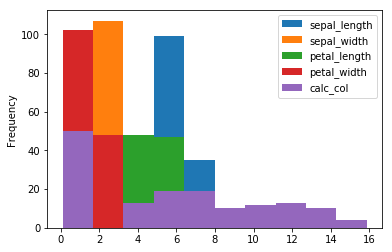

In [118]:
# let's make a histogram:
%matplotlib inline

iris_df2.plot.hist()

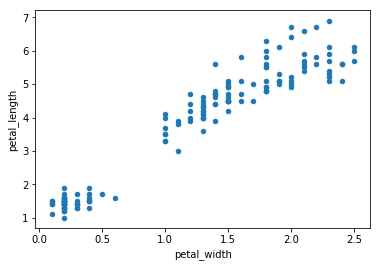

In [119]:
iris_df2.plot.scatter(x='petal_width', y='petal_length')